<a href="https://colab.research.google.com/github/emira99/Rally_Drone_Flutter/blob/master/TP_python_emirakechiche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stroke_dataset.csv')

In [79]:
df.shape

(5110, 12)

In [80]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
df.bmi= df.bmi.fillna(df.bmi.mean())


In [75]:
missing_values = df.isnull().sum()

In [81]:
percentage_missing = (df.isnull().sum() / len(df)) * 100


In [82]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [83]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [84]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [85]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [86]:
df.loc[df.stroke==1].age.mean()

67.72819277108434

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [89]:
x=df.iloc[:,0:11]
y=df.iloc[:,11]

In [90]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x2,y2=ros.fit_resample(x,y)

In [91]:
x2.shape

(9722, 11)

In [33]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,NaN,NaN,NaN,28.893237,7.698018,10.3,23.8,28.4,32.8,97.6


In [38]:
df.stroke.value_counts() /1000

0    4.861
1    0.249
Name: stroke, dtype: float64

<Axes: xlabel='smoking_status', ylabel='count'>

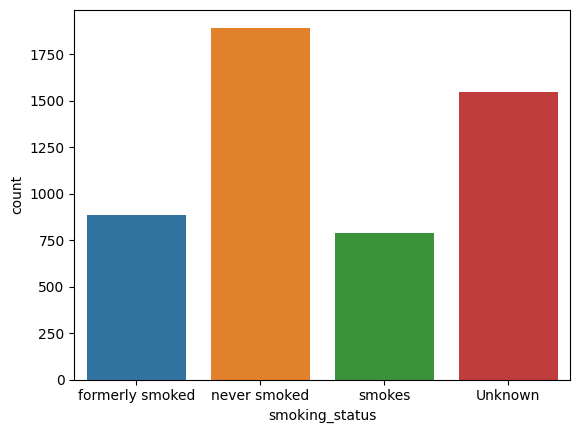

In [43]:
sns.countplot(x='smoking_status',data=df)

In [45]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [97]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X2, y2 = ros.fit_resample(x, y)


In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
random_state = 0)

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split( x , y , test_size=0.2 , random_state=0)

In [106]:
print(df.select_dtypes(include='object').columns)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [107]:
print(df['stroke'].value_counts(normalize=True) * 100)

0    95.127202
1     4.872798
Name: stroke, dtype: float64


In [108]:
print(df['age'].mean())

43.226614481409


In [109]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
print((Q1, Q3))

(23.5, 33.1)


In [110]:
most_frequent_category = df['smoking_status'].value_counts().idxmax()
count_most_frequent_category = df['smoking_status'].value_counts().max()
print((most_frequent_category, count_most_frequent_category))

('never smoked', 1892)


In [111]:
age_mean_stroke = df[df['stroke'] == 1]['age'].mean()
print(age_mean_stroke)

67.72819277108434


In [112]:
hypertension_mean_stroke = df[df['stroke'] == 1]['hypertension'].mean()
print(hypertension_mean_stroke)

0.26506024096385544


In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

df = df.drop('id', axis=1)


le = LabelEncoder()
df_categorical = df.select_dtypes(include='object')
df_categorical = df_categorical.apply(le.fit_transform)
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)

X = df.drop('stroke', axis=1)
y = df['stroke']


ros = RandomOverSampler(random_state=0)
X2, y2 = ros.fit_resample(X, y)

print(X2.shape)


(9722, 10)


In [122]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
X2_imputed = imputer.fit_transform(X2)

In [123]:
X2_cleaned = X2.dropna()
y2_cleaned = y2[X2.index]


In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
X2_imputed = imputer.fit_transform(X2)

x_train, x_test, y_train, y_test = train_test_split(X2_imputed, y2, test_size=0.2, random_state=0)


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(x_train)
X_test_sc = scaler.transform(x_test)

model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

model.fit(X_train_sc, y_train)

y_pred_knn = model.predict(X_test_sc)

accuracy = accuracy_score(y_test, y_pred_knn)
print(accuracy)


0.9300771208226221


In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(x_train)
X_test_sc = scaler.transform(x_test)


model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')


model.fit(X_train_sc, y_train)

y_pred_knn = model.predict(X_test_sc)


accuracy = accuracy_score(y_test, y_pred_knn)
print(accuracy)


ValueError: ignored